In [16]:
import os
import matplotlib.pyplot as plt

from models.cycleGAN import CycleGAN
from utils.loaders import DataLoader

In [30]:
# run params
SECTION = 'paint'
RUN_ID = '0001'
DATA_NAME = 'apple2orange'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode =  'build' # 'build' # 

In [31]:
IMAGE_SIZE = 128

In [32]:
data_loader = DataLoader(dataset_name=DATA_NAME, img_res=(IMAGE_SIZE, IMAGE_SIZE))

In [33]:
gan = CycleGAN(
    input_dim = (IMAGE_SIZE,IMAGE_SIZE,3)
    ,learning_rate = 0.0002
    , buffer_max_length = 50
    , lambda_validation = 1
    , lambda_reconstr = 10
    , lambda_id = 2
    , generator_type = 'unet'
    , gen_n_filters = 32
    , disc_n_filters = 32
    )

if mode == 'build':
    gan.save(RUN_FOLDER)
else:
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [34]:
gan.g_BA.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_71 (Conv2D)              (None, 64, 64, 32)   1568        input_16[0][0]                   
__________________________________________________________________________________________________
instance_normalization_54 (Inst (None, 64, 64, 32)   0           conv2d_71[0][0]                  
__________________________________________________________________________________________________
activation_36 (Activation)      (None, 64, 64, 32)   0           instance_normalization_54[0][0]  
__________________________________________________________________________________________________
conv2d_72 

In [35]:
gan.g_AB.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_63 (Conv2D)              (None, 64, 64, 32)   1568        input_15[0][0]                   
__________________________________________________________________________________________________
instance_normalization_47 (Inst (None, 64, 64, 32)   0           conv2d_63[0][0]                  
__________________________________________________________________________________________________
activation_29 (Activation)      (None, 64, 64, 32)   0           instance_normalization_47[0][0]  
__________________________________________________________________________________________________
conv2d_64 

In [36]:
gan.d_A.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 64, 64, 32)        1568      
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 32, 32, 64)        32832     
_________________________________________________________________
instance_normalization_41 (I (None, 32, 32, 64)        0         
_________________________________________________________________
leaky_re_lu_18 (LeakyReLU)   (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 16, 16, 128)       131200    
__________

In [37]:
gan.d_B.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 64, 64, 32)        1568      
_________________________________________________________________
leaky_re_lu_21 (LeakyReLU)   (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 32, 32, 64)        32832     
_________________________________________________________________
instance_normalization_44 (I (None, 32, 32, 64)        0         
_________________________________________________________________
leaky_re_lu_22 (LeakyReLU)   (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 16, 16, 128)       131200    
__________

In [38]:
BATCH_SIZE = 1
EPOCHS = 200
PRINT_EVERY_N_BATCHES = 10

TEST_A_FILE = 'n07740461_14740.jpg'
TEST_B_FILE = 'n07749192_4241.jpg'

In [39]:
data_loader.dataset_name

'apple2orange'

In [40]:
RUN_FOLDER

'run/paint/0001_apple2orange'

In [41]:
gan.train(data_loader
        , run_folder = RUN_FOLDER
        , epochs=EPOCHS
        , test_A_file = TEST_A_FILE
        , test_B_file = TEST_B_FILE
        , batch_size=BATCH_SIZE
        , sample_interval=PRINT_EVERY_N_BATCHES)

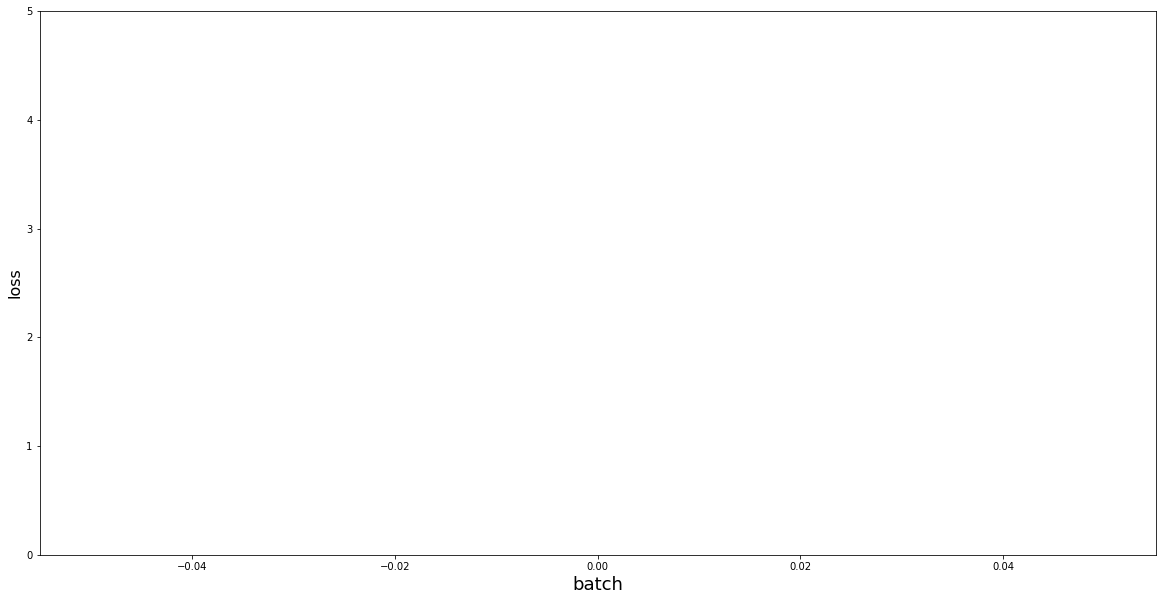

In [42]:
fig = plt.figure(figsize=(20,10))

plt.plot([x[1] for x in gan.g_losses], color='green', linewidth=0.1) #DISCRIM LOSS
# plt.plot([x[2] for x in gan.g_losses], color='orange', linewidth=0.1)
plt.plot([x[3] for x in gan.g_losses], color='blue', linewidth=0.1) #CYCLE LOSS
# plt.plot([x[4] for x in gan.g_losses], color='orange', linewidth=0.25)
plt.plot([x[5] for x in gan.g_losses], color='red', linewidth=0.25) #ID LOSS
# plt.plot([x[6] for x in gan.g_losses], color='orange', linewidth=0.25)

plt.plot([x[0] for x in gan.g_losses], color='black', linewidth=0.25)

# plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.ylim(0, 5)

plt.show()